<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Matplotlib: Visualização de Dados </p><br><br>

**Autor:** Emerson Aguiar <br>
**Data última atualização:** 14/04/2020 <br>
**Objetivo:** Exemplificar os principais gráficos usados em análises exploratória e explanatória de dados no Matplotlib.

Esse *notebook* é um compilado de questões básicas e respostas de como plotar e customizar gráficos no Matplotlib. Apesar de bem completa e popular, o Matplotlib é um tanto complicada, o que dificulta seu uso por usuários iniciais. Confira a documentação completa [aqui](https://matplotlib.org/users/index.html). 

Os principais tópicos cobertos por esse pseudo-artigo são os gráficos de linha, barras, pizza (sou contra, mas estão aí), pilhas, histogramas, subplots, box plots, séries temporais. Além disso, mostro algumas propriedades do eixos, legendas, anotações, como salvar figuras e outras coisas.

In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

No Jupyter Notebook, se você incluir `%matplotlib inline`, você não precisa chamar o `plt.show()` toda vez que você for plotar um gráfico.

Outra dica é para não aparecer a mensagem `<matplotlib.collections.PathCollection at 0x1182bc710>` toda vez que você criar um gráfico, adicione um ";" para a linha do plot. Veja a diferença abaixo.

Em muitos casos eu não usei essas dicas, ou até mesmo outras dicas que vou dar, fica a seu critério explora-las em diferentes situações.

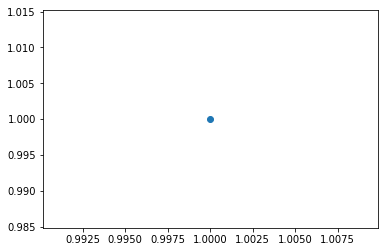

In [2]:
plt.scatter(1, 1)

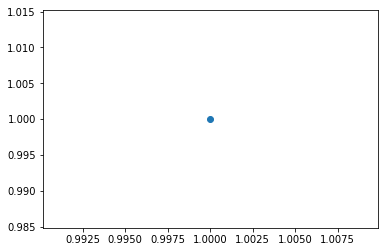

In [3]:
plt.scatter(1, 1);

Os dados usados nos primeiros 7 tipos de gráfico correspondem aos dados do Enem por escola de 2005 a 2015. Esses dados estão disponíveis no site do [Inep](http://inep.gov.br/microdados).

In [4]:
# Importando dados
db = pd.read_csv("MICRODADOS_ENEM_ESCOLA.csv", sep=';', encoding  = 'latin-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Gráfico de linhas

In [5]:
# As variáveis
db.columns

Index(['NU_ANO', 'CO_UF_ESCOLA', 'SG_UF_ESCOLA', 'CO_MUNICIPIO_ESCOLA',
       'NO_MUNICIPIO_ESCOLA', 'CO_ESCOLA_EDUCACENSO', 'NO_ESCOLA_EDUCACENSO',
       'TP_DEPENDENCIA_ADM_ESCOLA', 'TP_LOCALIZACAO_ESCOLA', 'NU_MATRICULAS',
       'NU_PARTICIPANTES_NEC_ESP', 'NU_PARTICIPANTES', 'NU_TAXA_PARTICIPACAO',
       'NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT',
       'NU_MEDIA_RED', 'NU_MEDIA_OBJ', 'NU_MEDIA_TOT', 'INSE',
       'PC_FORMACAO_DOCENTE', 'NU_TAXA_PERMANENCIA', 'NU_TAXA_APROVACAO',
       'NU_TAXA_REPROVACAO', 'NU_TAXA_ABANDONO', 'PORTE_ESCOLA'],
      dtype='object')

In [6]:
# Média prova de Matemática e Tecnologia por UF
db_mt = pd.DataFrame(db.groupby('SG_UF_ESCOLA')['NU_MEDIA_MT'].mean()).reset_index()

# Média prova de Ciências da Natureza por UF
db_cn = pd.DataFrame(db.groupby('SG_UF_ESCOLA')['NU_MEDIA_CN'].mean()).reset_index()

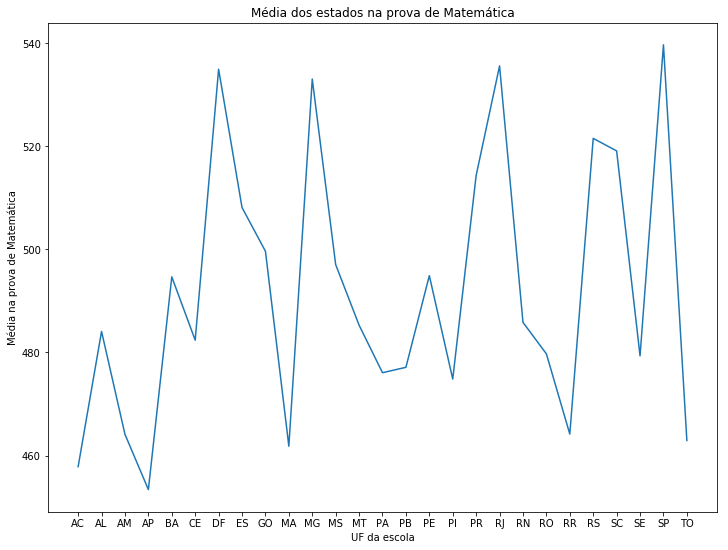

In [7]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.xlabel('UF da escola') # Define o nome do eixo x
plt.ylabel('Média na prova de Matemática') # Define o nome do eixo y
plt.title('Média dos estados na prova de Matemática') # Define o título do gráfico

plt.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT) # Cria um gráfico de linhas simples


Caso queiramos adicionar outro curva ao gráfico, basta adicionarmos ao código mais uma linha que cria gráfico, com o mesmo eixo x.

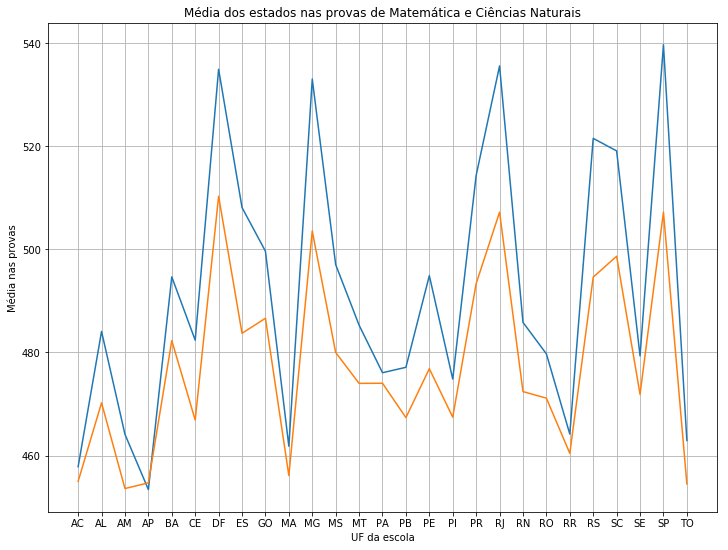

In [8]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.xlabel('UF da escola') # Define o nome do eixo x
plt.ylabel('Média nas provas') # Define o nome do eixo y
plt.title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
plt.grid(True) # Adiciona a grade no gráfico

plt.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT) # Cria um gráfico de linhas simples matemática
plt.plot(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN) # Cria um gráfico de linhas simples ciências

Para adicionar legenda as curvas existem duas maneiras:
1. Adicionar o nome na função `plt.legend()`: plt.legend(['Curva 1', 'Curva 2']). Esse resultado pode confundir no momento de garantir o nome adequado a curva. 
2. Adicionar o parâmetro `label` na função que plota o gráfico.

Para as duas maneiras é necessário adicionar a função `plt.legend()`.

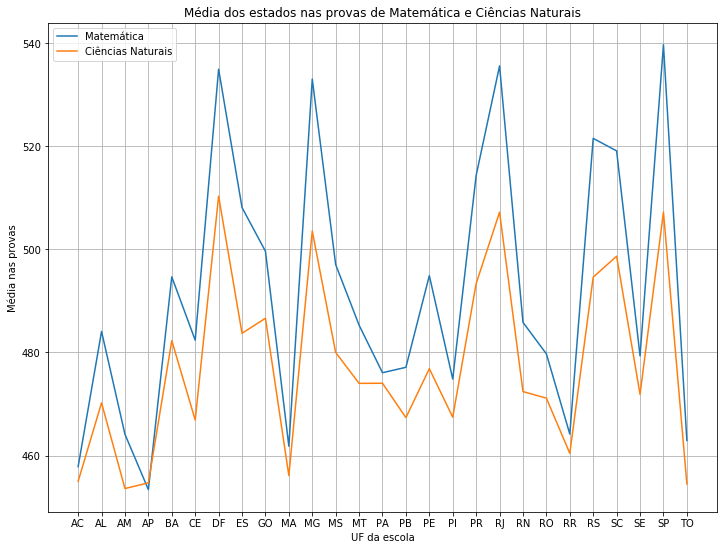

In [9]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.xlabel('UF da escola') # Define o nome do eixo x
plt.ylabel('Média nas provas') # Define o nome do eixo y
plt.title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
plt.grid(True) # Adiciona a grade no gráfico

plt.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label = 'Matemática') # Cria um gráfico de linhas simples matemática
plt.plot(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN, label = 'Ciências Naturais') # Cria um gráfico de linhas simples ciências

plt.legend()
# plt.legend(['Matemática', 'Ciências Naturais']) # Caso não tenhamos o parâmetro label na função plot

Podemos usar as funções `plt.ylim()` e `plt.xlim()` para definir o alcance dos eixos.

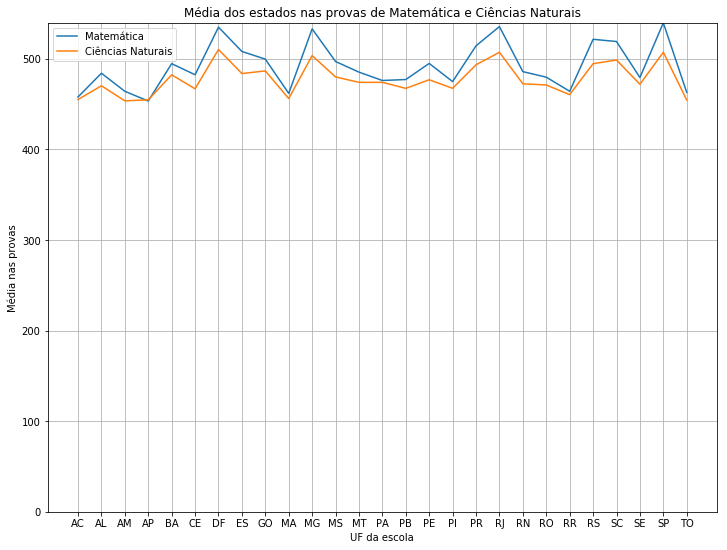

In [10]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.xlabel('UF da escola') # Define o nome do eixo x
plt.ylabel('Média nas provas') # Define o nome do eixo y
plt.title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
plt.grid(True) # Adiciona a grade no gráfico

plt.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label = 'Matemática') # Cria um gráfico de linhas simples matemática
plt.plot(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN, label = 'Ciências Naturais') # Cria um gráfico de linhas simples ciências

plt.ylim(0.0,540.0) # for y axis
#plt.xlim(0, 50) # for x axis

plt.legend()
# plt.legend(['Matemática', 'Ciências Naturais']) # Caso não tenhamos o parâmetro label na função plot

É possível alterar o estilo das curvas usando os parâmetros:
* `fmt`: A format string consists of a part for color, marker and line: `fmt = '[marker][line][color]'`
* `color` = change the colors
* `linestyle` (ls): muda o tipo de linha (contínua, pontilhada, etc.)
* `marker`: põe um marcador (ponto, triângulo, etc.) na linha
* `linewidth` (lw): Muda a largura da linha

Mais informações: https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.plot.html

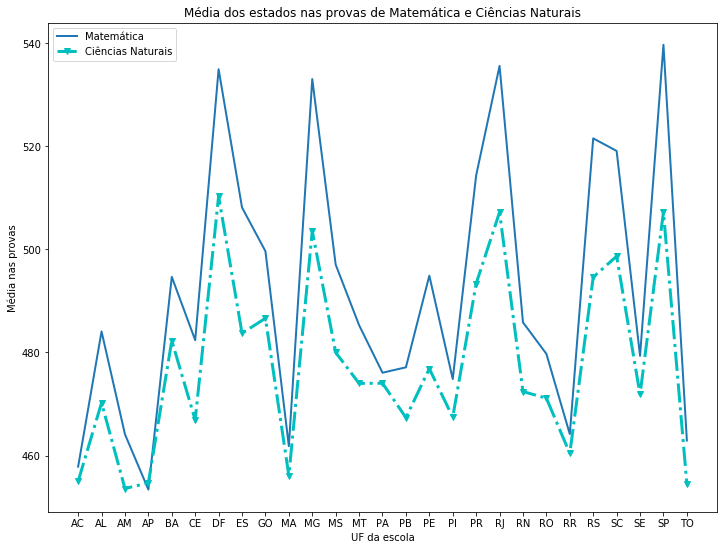

In [11]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.xlabel('UF da escola') # Define o nome do eixo x
plt.ylabel('Média nas provas') # Define o nome do eixo y
plt.title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico

plt.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label = 'Matemática', lw = 2); # Cria um gráfico de linhas simples matemática
plt.plot(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN, label = 'Ciências Naturais', color = 'c', linestyle = '-.', marker = 'v', linewidth = 3); # Cria um gráfico de linhas simples ciências

plt.legend()

Abaixo estão outras opções de estilos de linhas.

![](style.png)

Abaixo estão outras opções de marcadores que você pode gostar.

![title](styles.png)

Outra forma de mudar a aparência do gráfico é mudando o seu estilo.

In [12]:
# Estilos disponíveis no Matplotlib
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


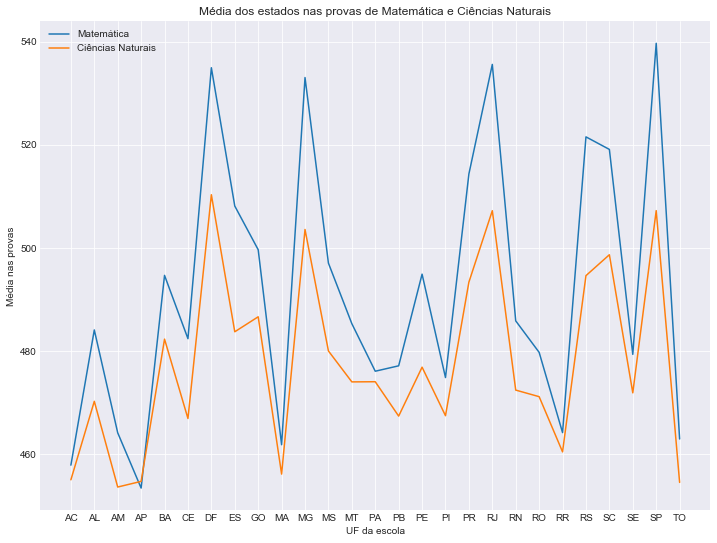

In [13]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('seaborn-darkgrid') # Define o estilo
plt.xlabel('UF da escola') # Define o nome do eixo x
plt.ylabel('Média nas provas') # Define o nome do eixo y
plt.title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
plt.grid(True) # Adiciona a grade no gráfico

plt.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label = 'Matemática') # Cria um gráfico de linhas simples matemática
plt.plot(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN, label = 'Ciências Naturais') # Cria um gráfico de linhas simples ciências

plt.legend()

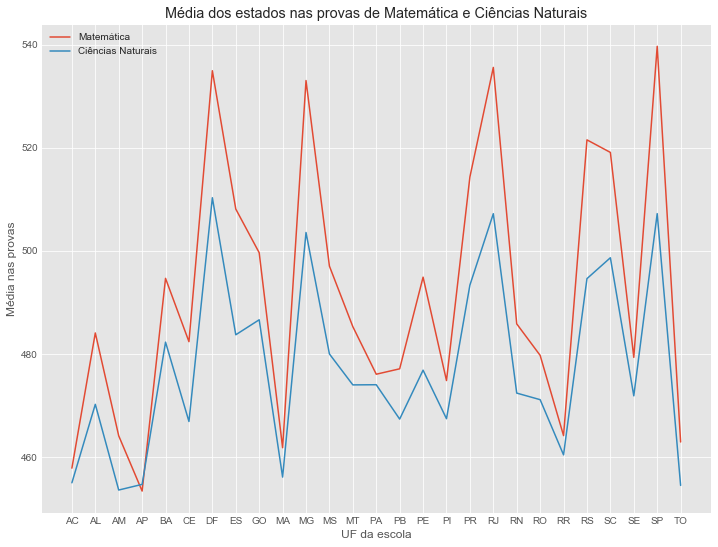

In [14]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('ggplot') # Define o estilo
plt.xlabel('UF da escola') # Define o nome do eixo x
plt.ylabel('Média nas provas') # Define o nome do eixo y
plt.title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
plt.grid(True) # Adiciona a grade no gráfico

plt.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label = 'Matemática') # Cria um gráfico de linhas simples matemática
plt.plot(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN, label = 'Ciências Naturais') # Cria um gráfico de linhas simples ciências

plt.legend()

Outros estilo interessante é o que faz parecer um desenho a mão. Para isso use a função `plt.xkcd` ao invés da `plt.style.use()`.

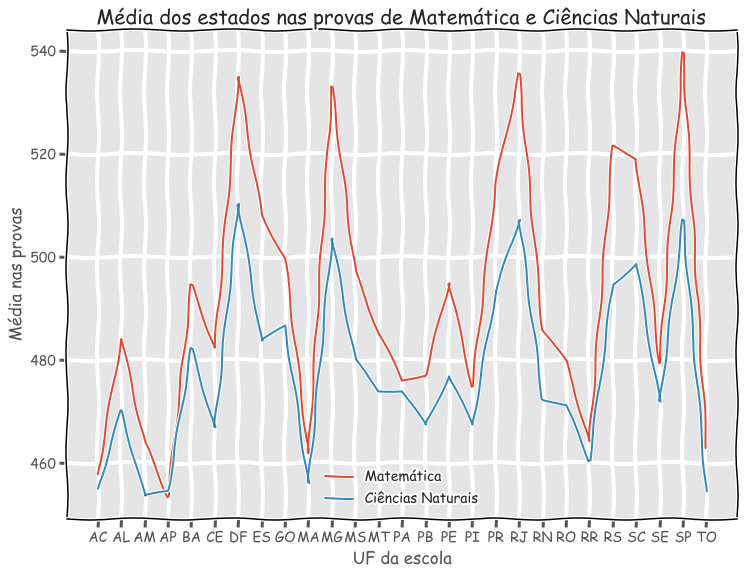

In [15]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.xkcd() # Define o estilo
plt.xlabel('UF da escola') # Define o nome do eixo x
plt.ylabel('Média nas provas') # Define o nome do eixo y
plt.title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
plt.grid(True) # Adiciona a grade no gráfico

plt.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label = 'Matemática') # Cria um gráfico de linhas simples matemática
plt.plot(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN, label = 'Ciências Naturais') # Cria um gráfico de linhas simples ciências

plt.legend()

Se quiser salvar seu gráfico em boa qualidade, use a função `plt.savefig()`.

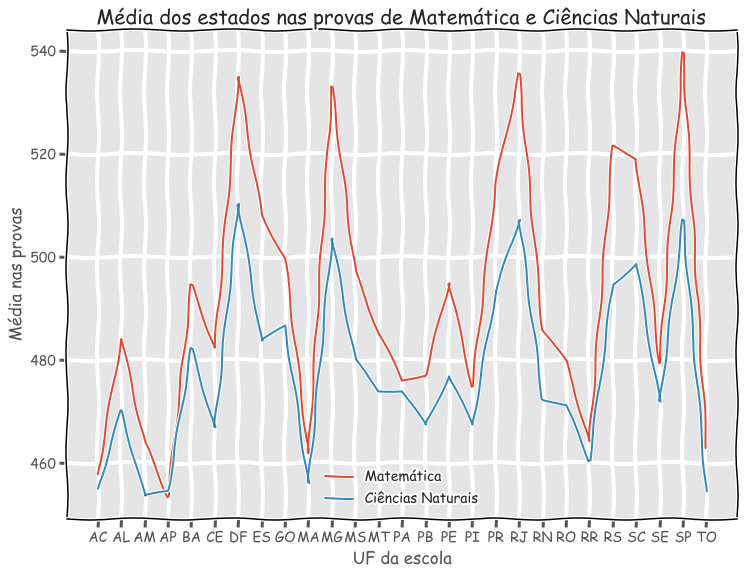

In [16]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.xkcd() # Define o estilo
plt.xlabel('UF da escola') # Define o nome do eixo x
plt.ylabel('Média nas provas') # Define o nome do eixo y
plt.title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
plt.grid(True) # Adiciona a grade no gráfico

plt.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label = 'Matemática') # Cria um gráfico de linhas simples matemática
plt.plot(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN, label = 'Ciências Naturais') # Cria um gráfico de linhas simples ciências

plt.legend()
plt.savefig('Mat e Ciencias por UF.png')

# Bar chart

Para construir o gráfico de barras, ao invés do gráfico de linhas, basta mudar a função `plot()` para `bar()`.

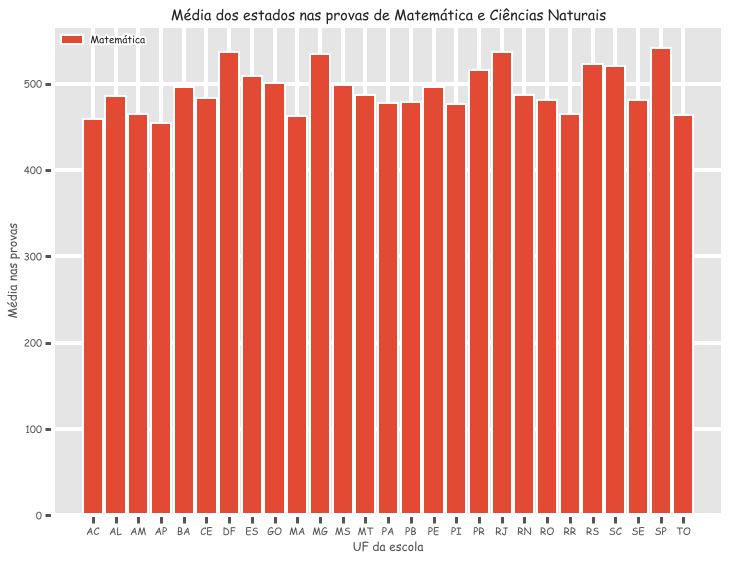

In [17]:
# Imprimir o gráfico de barras
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.xkcd(False) # Define o estilo
plt.style.use('ggplot') # Define o estilo
plt.xlabel('UF da escola') # Define o nome do eixo x
plt.ylabel('Média nas provas') # Define o nome do eixo y
plt.title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
plt.grid(True) # Adiciona a grade no gráfico

plt.bar(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label = 'Matemática') # Cria um gráfico de linhas simples matemática

plt.legend()

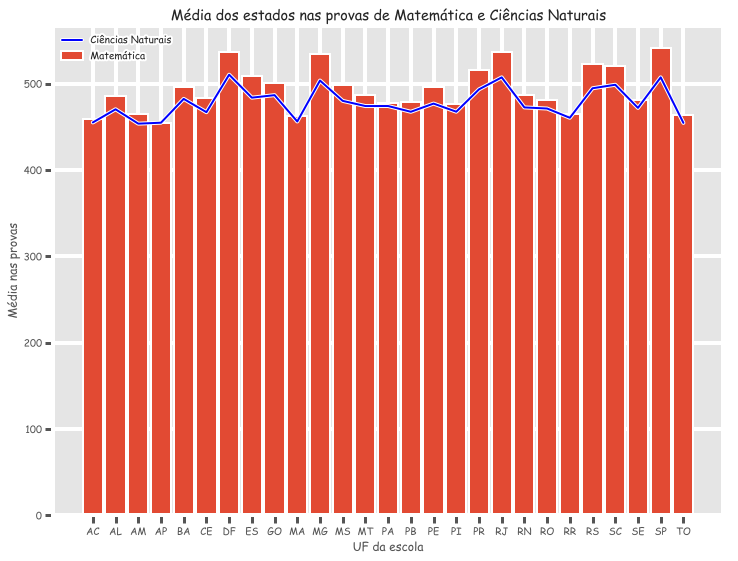

In [18]:
# Imprimir o gráfico de barras
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.xkcd(False) # Define o estilo
plt.style.use('ggplot') # Define o estilo
plt.xlabel('UF da escola') # Define o nome do eixo x
plt.ylabel('Média nas provas') # Define o nome do eixo y
plt.title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
plt.grid(True) # Adiciona a grade no gráfico

plt.bar(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label = 'Matemática') # Cria um gráfico de linhas simples matemática
plt.plot(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN, label = 'Ciências Naturais', color = 'b') # Cria um gráfico de linhas simples ciências

plt.legend()

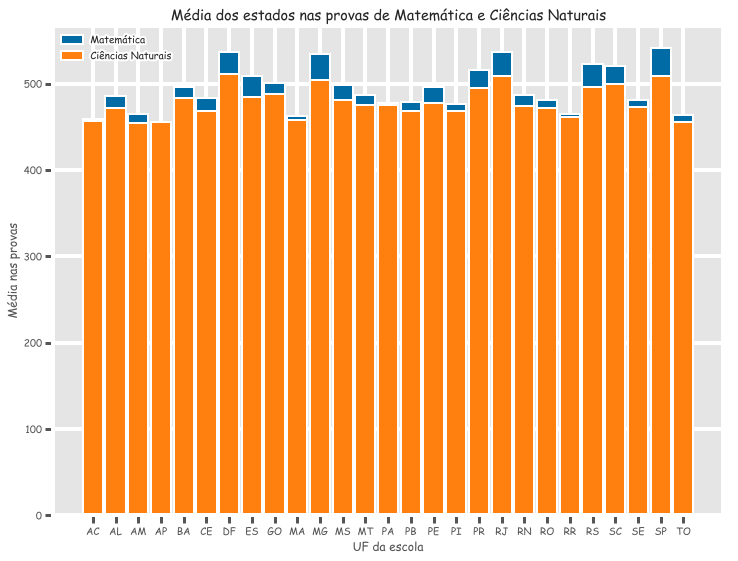

In [19]:
# Construindo gráficos combinados
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('tableau-colorblind10') # Define o estilo
plt.xlabel('UF da escola') # Define o nome do eixo x
plt.ylabel('Média nas provas') # Define o nome do eixo y
plt.title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico

plt.bar(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label = 'Matemática') # Cria um gráfico de linhas simples matemática
plt.bar(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN, label = 'Ciências Naturais') # Cria um gráfico de linhas simples ciências

plt.legend()

O que tivemos anteriormente foram barras empilhadas. Porém o que queremos ver no gráfico são **barras lado a lado**.

In [20]:
np.arange(1, len(db_mt.SG_UF_ESCOLA))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26])

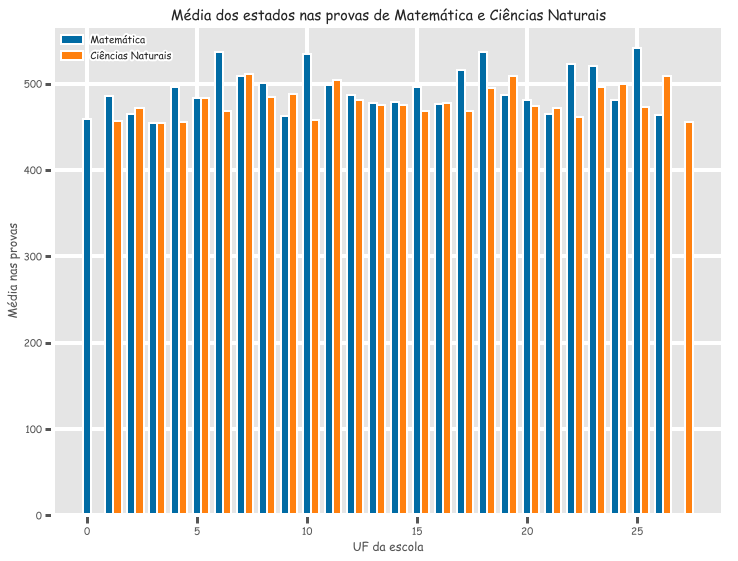

In [21]:
# Construindo gráficos com barras lado a lado

plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('tableau-colorblind10') # Define o estilo
plt.xlabel('UF da escola') # Define o nome do eixo x
plt.ylabel('Média nas provas') # Define o nome do eixo y
plt.title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico

# Cria um ndarray do tamanho do eixo x
ind = np.arange(len(db_mt.SG_UF_ESCOLA)) # localização do eixo
ind2 = np.arange(1, len(db_mt.SG_UF_ESCOLA)+1)
width = 0.3 # largura das barras

# Adicionamos ou subtraimos o valor width do índice para descolar a barra
plt.bar(ind, db_mt.NU_MEDIA_MT, width, label = 'Matemática') # Média Matemática
plt.bar(ind2 + width + 0.07, db_cn.NU_MEDIA_CN, width, label = 'Ciências Naturais') # Média Ciências Naturais

plt.legend()

Alocamos as barras da forma que queríamos, mas perdemos os valores das barras. Logo, demos alterar esses valores com o parâmetro `xticks()`.

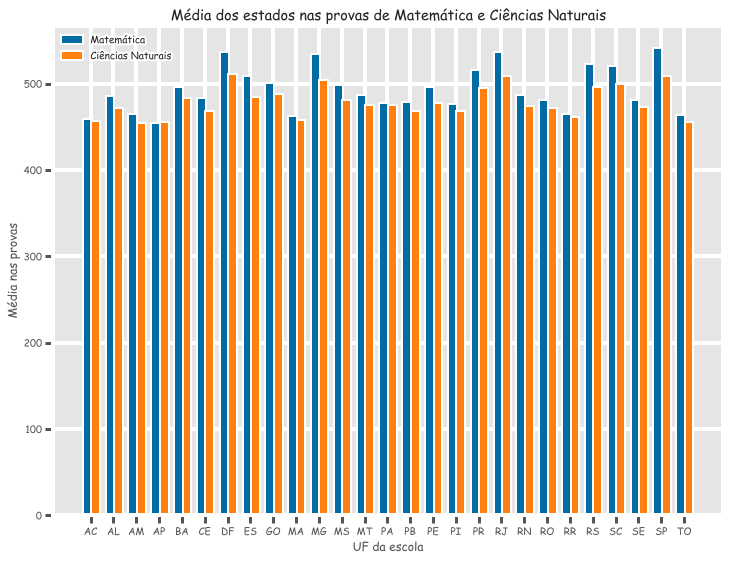

In [22]:
# Construindo gráficos com barras lado a lado

plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('tableau-colorblind10') # Define o estilo
plt.xlabel('UF da escola') # Define o nome do eixo x
plt.ylabel('Média nas provas') # Define o nome do eixo y
plt.title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico

# Cria um ndarray do tamanho do eixo x
ind = np.arange(len(db_mt.SG_UF_ESCOLA)) # localização do eixo
ind2 = np.arange(len(db_mt.SG_UF_ESCOLA))
width = 0.3 # largura das barras

# Adicionamos ou subtraimos o valor width do índice para descolar a barra
plt.bar(ind, db_mt.NU_MEDIA_MT, width, label = 'Matemática') # Média Matemática
plt.bar(ind2 + width + 0.07, db_cn.NU_MEDIA_CN, width, label = 'Ciências Naturais') # Média Ciências Naturais

plt.xticks(ticks = ind + width/2, labels = db_mt.SG_UF_ESCOLA.values.tolist()) # Adicionando descrições para o eixo x

plt.legend()

Se quisermos o **gráfico de barras na horizontal**, precisamos mudar:
1. Função `bar()` por `barh()`;
2. Trocar o `xlabel` por `ylabel` e vice-versa.

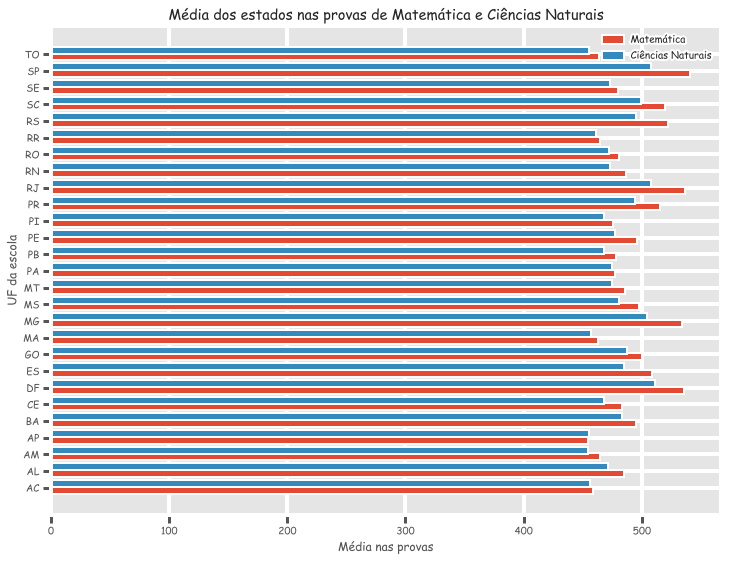

In [23]:
# Construindo gráficos com barras lado a lado

plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('ggplot') # Define o estilo
plt.ylabel('UF da escola') # Define o nome do eixo x
plt.xlabel('Média nas provas') # Define o nome do eixo y
plt.title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico

# Cria um ndarray do tamanho do eixo x
ind = np.arange(len(db_mt.SG_UF_ESCOLA)) # localização do eixo
ind2 = np.arange(len(db_mt.SG_UF_ESCOLA))
width = 0.3 # largura das barras

# Adicionamos ou subtraimos o valor width do índice para descolar a barra
plt.barh(ind, db_mt.NU_MEDIA_MT, width, label = 'Matemática') # Média Matemática
plt.barh(ind2 + width+0.085, db_cn.NU_MEDIA_CN, width, label = 'Ciências Naturais') # Média Ciências Naturais

plt.yticks(ticks = ind + width/2, labels = db_mt.SG_UF_ESCOLA.values.tolist()) # Adicionando descrições para o eixo x

plt.legend()

# Pie chart

In [24]:
db_tot_tip = db.loc[:,['NU_MEDIA_TOT', 'TP_DEPENDENCIA_ADM_ESCOLA']].groupby('TP_DEPENDENCIA_ADM_ESCOLA')['NU_MEDIA_TOT'].mean().reset_index()

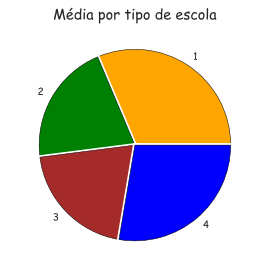

In [25]:
plt.style.use('ggplot')
cores=['orange', 'green', 'brown', 'blue']

# edgecolor são as cores da divisão do gráfico
plt.pie(db_tot_tip.NU_MEDIA_TOT, labels=db_tot_tip.TP_DEPENDENCIA_ADM_ESCOLA, colors=cores, wedgeprops={'edgecolor':'black'})

plt.title('Média por tipo de escola')
plt.tight_layout() # sustenta as proporções do gráfico
plt.show()

Como na variável `TP_DEPENDENCIA_ADM_ESCOLA` temos códigos, podemos passar para o parâmetro `labels` uma lista com a descrição.

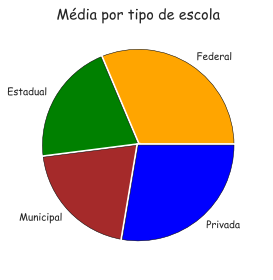

In [26]:
plt.style.use('ggplot')
cores=['orange', 'green', 'brown', 'blue']

# edgecolor são as cores da divisão do gráfico
plt.pie(db_tot_tip.NU_MEDIA_TOT, labels=['Federal', 'Estadual', 'Municipal', 'Privada'], colors=cores, wedgeprops={'edgecolor':'black'})

plt.title('Média por tipo de escola')
plt.tight_layout() # sustenta as proporções do gráfico
plt.show()

Digamos que você queira dar ênfase numa das partes do gráfico. Podemos usar o parâmetro `explode`.

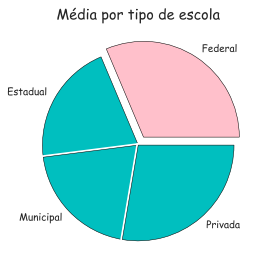

In [27]:
plt.style.use('ggplot')
cores=['pink', 'c', 'c', 'c']
atencao = [0.1, 0, 0, 0] # deslocar a quarta categoria 15%

# edgecolor são as cores da divisão do gráfico
plt.pie(db_tot_tip.NU_MEDIA_TOT, labels=['Federal', 'Estadual', 'Municipal', 'Privada'], explode = atencao,
        colors=cores, wedgeprops={'edgecolor':'black'})

plt.title('Média por tipo de escola')
plt.tight_layout() # sustenta as proporções do gráfico
plt.show()

Adicionando funções extras:
1. `shadow` adiciona sombra ao gráfico, o deixando em forma de 3D
2. `startangle` gira o gráfico
3. `autopct` adiciona as porcentagens respectivas

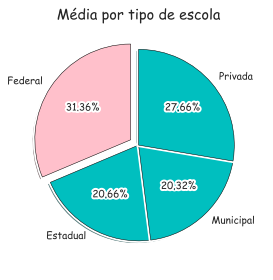

In [28]:
plt.style.use('ggplot')
cores=['pink', 'c', 'c', 'c']
atencao = [0.1, 0, 0, 0] # deslocar a quarta categoria 15%

# edgecolor são as cores da divisão do gráfico
plt.pie(db_tot_tip.NU_MEDIA_TOT, labels=['Federal', 'Estadual', 'Municipal', 'Privada'], explode = atencao, shadow=True,
        startangle=90, autopct='%1.2f%%', colors=cores, wedgeprops={'edgecolor':'black'})

plt.title('Média por tipo de escola')
plt.tight_layout() # sustenta as proporções do gráfico
plt.show()

# Stack Plots

In [29]:
db_stackplot = db.loc[:,['NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_RED', 'TP_DEPENDENCIA_ADM_ESCOLA']].groupby(
    'TP_DEPENDENCIA_ADM_ESCOLA')['NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_RED'].mean().reset_index()

# Adiciona as descrições das escolas ao dataframe
db_stackplot['TipoEscola'] = ['Federal', 'Estadual', 'Municipal', 'Privada']

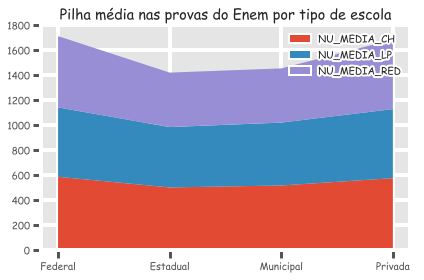

In [30]:
plt.stackplot(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_CH, db_stackplot.NU_MEDIA_LP, db_stackplot.NU_MEDIA_RED, 
              labels=db_stackplot.columns.tolist()[1:])
plt.legend()
plt.title("Pilha média nas provas do Enem por tipo de escola")
plt.tight_layout()
plt.show()

Para personalizar o gráfico, é possível adicionar o parâmetro `labels` informando uma lista dos mesmos e `colors` também com uma lista.

Observe que a legenda não ficou bem posicionada no gráfico. Podemos fazer essa alteração usanco o parâmetro `loc` na função `plt.legend()`

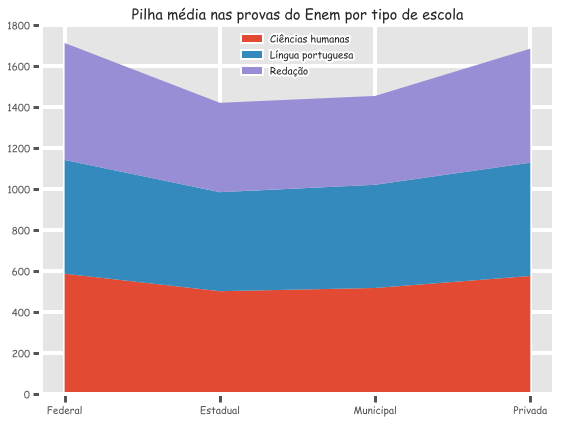

In [31]:
plt.figure(figsize=(8,6)) # Dimensões do gráfico
plt.stackplot(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_CH, db_stackplot.NU_MEDIA_LP, db_stackplot.NU_MEDIA_RED, 
              labels=['Ciências humanas', 'Língua portuguesa', 'Redação'])
plt.legend(loc='upper center') # também é possível colocar as coordenadas
plt.title("Pilha média nas provas do Enem por tipo de escola")
plt.tight_layout()
plt.show()

## Filling Area on line plots

In [32]:
db.columns

Index(['NU_ANO', 'CO_UF_ESCOLA', 'SG_UF_ESCOLA', 'CO_MUNICIPIO_ESCOLA',
       'NO_MUNICIPIO_ESCOLA', 'CO_ESCOLA_EDUCACENSO', 'NO_ESCOLA_EDUCACENSO',
       'TP_DEPENDENCIA_ADM_ESCOLA', 'TP_LOCALIZACAO_ESCOLA', 'NU_MATRICULAS',
       'NU_PARTICIPANTES_NEC_ESP', 'NU_PARTICIPANTES', 'NU_TAXA_PARTICIPACAO',
       'NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT',
       'NU_MEDIA_RED', 'NU_MEDIA_OBJ', 'NU_MEDIA_TOT', 'INSE',
       'PC_FORMACAO_DOCENTE', 'NU_TAXA_PERMANENCIA', 'NU_TAXA_APROVACAO',
       'NU_TAXA_REPROVACAO', 'NU_TAXA_ABANDONO', 'PORTE_ESCOLA'],
      dtype='object')

In [33]:
media_prova = ['NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_RED', 'NU_MEDIA_OBJ', 'NU_MEDIA_TOT']

db_stackplot = db.loc[:,['NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_RED', 'NU_MEDIA_OBJ', 
                         'NU_MEDIA_TOT', 'TP_DEPENDENCIA_ADM_ESCOLA']].groupby('TP_DEPENDENCIA_ADM_ESCOLA')[media_prova].mean().reset_index()

# Adiciona as descrições das escolas ao dataframe
db_stackplot['TipoEscola'] = ['Federal', 'Estadual', 'Municipal', 'Privada']

Na função `fill_between()` os dois primeiros parâmetros são os eixos `x` e `y` respectivamente. O parâmetro `alpha` indica o quanto transparente vai estar o área.

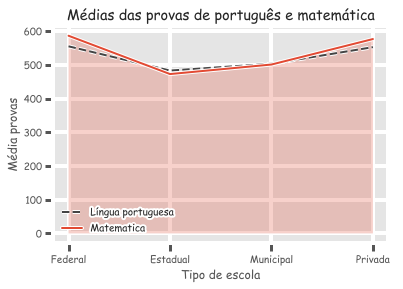

In [34]:
plt.plot(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_LP, color='#444444',
        linestyle='--', label='Língua portuguesa')

plt.plot(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT, label='Matematica')

plt.fill_between(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT, alpha=0.25) # Adicina área abaixo da curva

plt.legend()

plt.title('Médias das provas de português e matemática')
plt.xlabel("Tipo de escola")
plt.ylabel("Média provas")
plt.show()

Digamos que queremos saber o ponto onde o gráfico ultrapassa algum valor, por exemplo a média da prova de matemática. Então precisamos adicionar mais um parâmetro a função `fill_between()`.

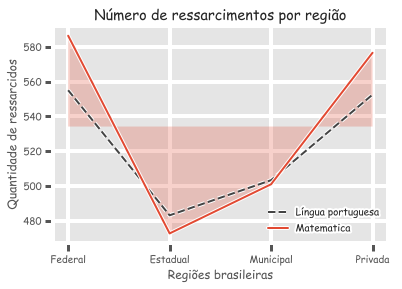

In [35]:
plt.plot(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_LP, color='#444444',
        linestyle='--', label='Língua portuguesa')

plt.plot(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT, label='Matematica')

plt.fill_between(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT, db_stackplot.NU_MEDIA_MT.mean(), alpha=0.25) # Adicina área abaixo da curva

plt.legend()

plt.title('Número de ressarcimentos por região')
plt.xlabel("Regiões brasileiras")
plt.ylabel("Quantidade de ressarcidos")
plt.show()

Então, as escolas estaduais e municipais possuem notas em matemática abaixo da média. As demais escolas possuem valores acima da média.

Para alterar as cores de cada parte, temos que adicionar mais uma função `fill_between()` e temos que adicionar uma condição (`where`) e uma interpolação (`interpolate`)  à função `fill_between()`. A condição precisa ter relação com o terceiro parâmetro apontado na função. As cores padrão são azul e rosa, mas também é possível selecioanar a desejada com o parâmetro `color`.

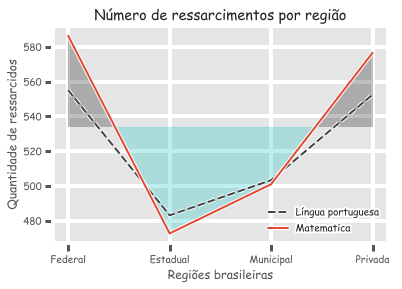

In [36]:
plt.plot(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_LP, color='#444444',
        linestyle='--', label='Língua portuguesa')

plt.plot(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT, label='Matematica')

plt.fill_between(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT, db_stackplot.NU_MEDIA_MT.mean(), 
                 where=(db_stackplot.NU_MEDIA_MT > db_stackplot.NU_MEDIA_MT.mean()), interpolate=True, 
                 color='black', alpha=0.25)

plt.fill_between(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT, db_stackplot.NU_MEDIA_MT.mean(), 
                 where=(db_stackplot.NU_MEDIA_MT <= db_stackplot.NU_MEDIA_MT.mean()), interpolate=True, 
                 color='c', alpha=0.25)

plt.legend()

plt.title('Número de ressarcimentos por região')
plt.xlabel("Regiões brasileiras")
plt.ylabel("Quantidade de ressarcidos")
plt.show()

Podemos também deixar o preenchimento entre cursas e adicionar `label` na função `fill_between()`. Observe que o terceiro parâmetro da função `fill_between()` também deve ser alterado.

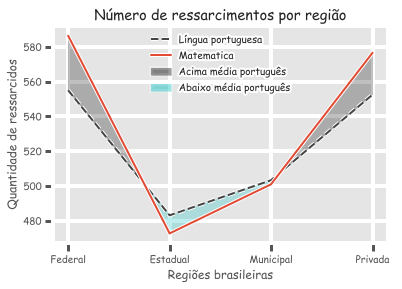

In [37]:
plt.plot(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_LP, color='#444444',
        linestyle='--', label='Língua portuguesa')

plt.plot(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT, label='Matematica')

plt.fill_between(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT, db_stackplot.NU_MEDIA_LP, 
                 where=(db_stackplot.NU_MEDIA_MT > db_stackplot.NU_MEDIA_LP), interpolate=True, 
                 color='black', alpha=0.25, label='Acima média português')

plt.fill_between(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT, db_stackplot.NU_MEDIA_LP, 
                 where=(db_stackplot.NU_MEDIA_MT <= db_stackplot.NU_MEDIA_LP), interpolate=True, 
                 color='c', alpha=0.25, label='Abaixo média português')

plt.legend()

plt.title('Número de ressarcimentos por região')
plt.xlabel("Regiões brasileiras")
plt.ylabel("Quantidade de ressarcidos")
plt.show()

Digamos que você quer mudar uma das descrições da legenda. Você pode, para mudar, o primeiro objeto:
1. Salvar a legenda numa variável e;
2. Mudar o item usando as funções `get_texts()[0]` e `set_text('Português')`.

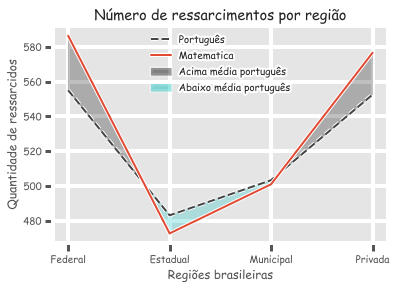

In [38]:
plt.plot(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_LP, color='#444444',
        linestyle='--', label='Língua portuguesa')

plt.plot(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT, label='Matematica')

plt.fill_between(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT, db_stackplot.NU_MEDIA_LP, 
                 where=(db_stackplot.NU_MEDIA_MT > db_stackplot.NU_MEDIA_LP), interpolate=True, 
                 color='black', alpha=0.25, label='Acima média português')

plt.fill_between(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT, db_stackplot.NU_MEDIA_LP, 
                 where=(db_stackplot.NU_MEDIA_MT <= db_stackplot.NU_MEDIA_LP), interpolate=True, 
                 color='c', alpha=0.25, label='Abaixo média português')

L = plt.legend()
L.get_texts()[0].set_text('Português')

plt.title('Número de ressarcimentos por região')
plt.xlabel("Regiões brasileiras")
plt.ylabel("Quantidade de ressarcidos")
plt.show()

Outro modo, seria criar uma lista com os nomes e colocar dentro do `plt.legend()`.

Podemos mudar o tamanho da fonte da legenda, usando o parâmetro `fontsize`. Você pode usar o mesmo parâmetro para o Título e nomes dos eixos.

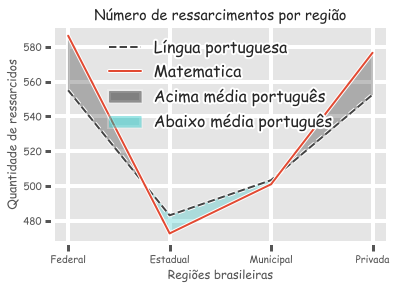

In [39]:
plt.plot(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_LP, color='#444444',
        linestyle='--')

plt.plot(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT)

plt.fill_between(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT, db_stackplot.NU_MEDIA_LP, 
                 where=(db_stackplot.NU_MEDIA_MT > db_stackplot.NU_MEDIA_LP), interpolate=True, 
                 color='black', alpha=0.25)

plt.fill_between(db_stackplot.TipoEscola, db_stackplot.NU_MEDIA_MT, db_stackplot.NU_MEDIA_LP, 
                 where=(db_stackplot.NU_MEDIA_MT <= db_stackplot.NU_MEDIA_LP), interpolate=True, 
                 color='c', alpha=0.25)

my_labels = ['Língua portuguesa', 'Matematica', 'Acima média português', 'Abaixo média português']
plt.legend(my_labels, fontsize = 16)

plt.title('Número de ressarcimentos por região')
plt.xlabel("Regiões brasileiras")
plt.ylabel("Quantidade de ressarcidos")
plt.show()

# Histograms

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


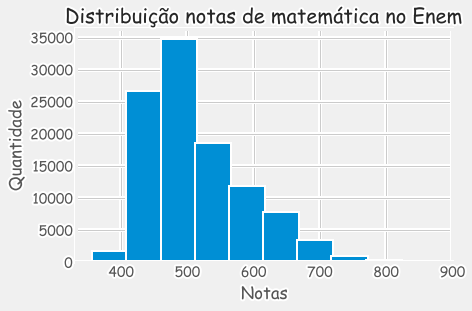

In [40]:
plt.style.use('fivethirtyeight')
plt.hist(db.NU_MEDIA_MT)

plt.title('Distribuição notas de matemática no Enem')
plt.xlabel('Notas')
plt.ylabel('Quantidade')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


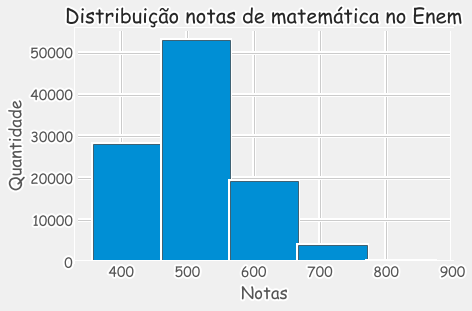

In [41]:
plt.style.use('fivethirtyeight')
plt.hist(db.NU_MEDIA_MT, bins=5, edgecolor='black') # define o número de barras e a cor da borda

plt.title('Distribuição notas de matemática no Enem')
plt.xlabel('Notas')
plt.ylabel('Quantidade')

plt.show()

É possível passar os **intervalos desejados para as bins**. Observe que os valores antes de 400 e maiores que 800 foram desconsiderados.

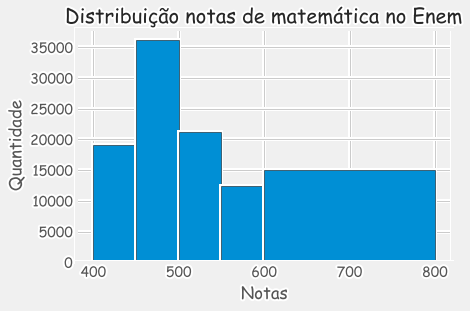

In [42]:
plt.style.use('fivethirtyeight')
plt.hist(db.NU_MEDIA_MT, bins=[400, 450, 500, 550, 600, 800], edgecolor='black')

plt.title('Distribuição notas de matemática no Enem')
plt.xlabel('Notas')
plt.ylabel('Quantidade')

plt.show()

Adicionando o parâmetro `log` mudamos a escala do histograma.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


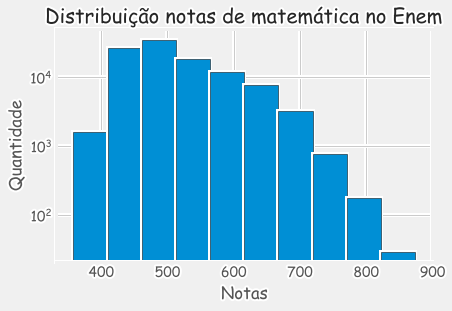

In [43]:
plt.style.use('fivethirtyeight')
plt.hist(db.NU_MEDIA_MT, log=True, edgecolor='black')

plt.title('Distribuição notas de matemática no Enem')
plt.xlabel('Notas')
plt.ylabel('Quantidade')

plt.show()

Para adicionar uma linha que, por exemplo, indique a média; usamos a função `plt.avxline()`.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


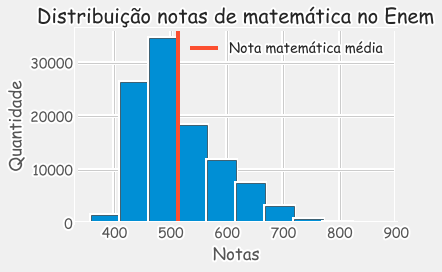

In [44]:
plt.style.use('fivethirtyeight')
plt.hist(db.NU_MEDIA_MT, edgecolor='black')

plt.axvline(db.NU_MEDIA_MT.mean(), color = '#fc4f30', label='Nota matemática média')
plt.legend()
plt.title('Distribuição notas de matemática no Enem')
plt.xlabel('Notas')
plt.ylabel('Quantidade')

plt.tight_layout()

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


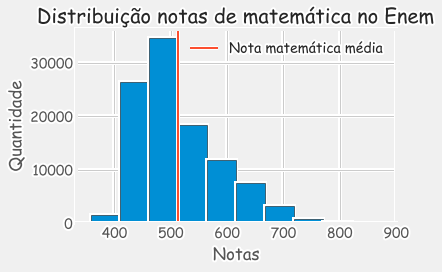

In [45]:
plt.style.use('fivethirtyeight')
plt.hist(db.NU_MEDIA_MT, edgecolor='black')

plt.axvline(db.NU_MEDIA_MT.mean(), color = '#fc4f30', label='Nota matemática média', linewidth=2) # muda a espessura da linha
plt.legend()
plt.title('Distribuição notas de matemática no Enem')
plt.xlabel('Notas')
plt.ylabel('Quantidade')

plt.tight_layout()

plt.show()

Se quisermos adicionar uma anotação, usamos a função `annotate()`. O parâmetro `xy` adiciona as coordenadas do argumento; o parâmetro `xytext` as coordenadas do rótulo; o parâmetro `arrowprops` adiciona uma flexa.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
No handles with labels found to put in legend.


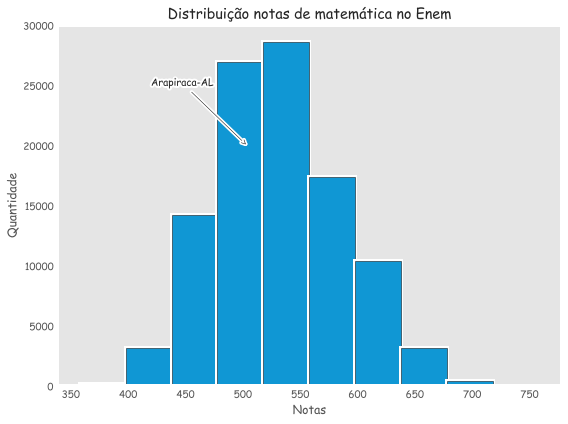

In [46]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6)) # Dimensões do gráfico

plt.annotate("Arapiraca-AL", xy=(504, 20000), xytext=(420, 25000),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='black'))

plt.hist(db.NU_MEDIA_CH, edgecolor='black', color='#1097d4')

plt.legend()
plt.title('Distribuição notas de matemática no Enem')
plt.xlabel('Notas')
plt.ylabel('Quantidade')
plt.grid(False)

plt.tight_layout()

plt.show()

# Scatter Plots

* `s` define o tamanho de cada ponto;
* `c` define a cor dos pontos;
* `edgecolor` define a cor da borda do ponto;
* `linewidth` define a espessura da linha da borda do ponto;
* `alpha` define a transparência do ponto.

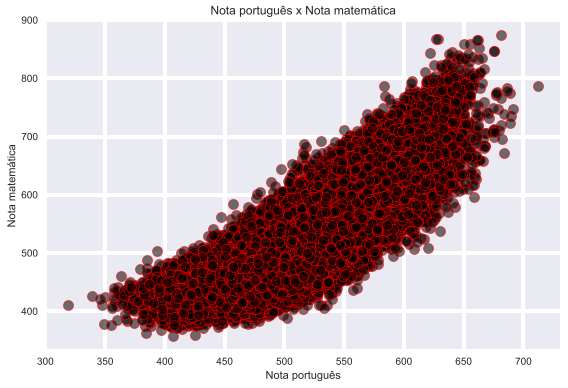

In [47]:
plt.style.use('seaborn')
plt.scatter(db.NU_MEDIA_LP, db.NU_MEDIA_MT, s=100, c='black', edgecolor='red', linewidth=1, alpha=0.55)

plt.title('Nota português x Nota matemática')
plt.xlabel('Nota português')
plt.ylabel('Nota matemática')

plt.tight_layout()

plt.show()

O parâmetro `marker` altera o tipo do marcador (círculo por padrão) para os pontos do gráfico de dispersão.

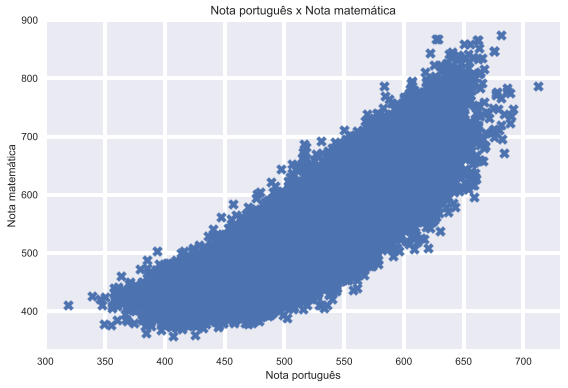

In [48]:
plt.style.use('seaborn')
plt.scatter(db.NU_MEDIA_LP, db.NU_MEDIA_MT, s=100, marker='X')

plt.title('Nota português x Nota matemática')
plt.xlabel('Nota português')
plt.ylabel('Nota matemática')

plt.tight_layout()

plt.show()

Também é possível usar outra **variável como parâmetro para o tamanho dos marcadores**.

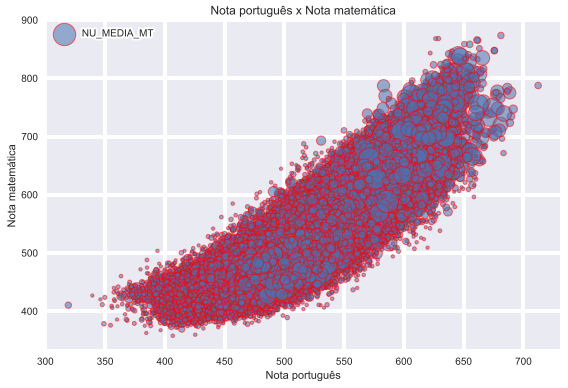

In [49]:
plt.style.use('seaborn')
plt.scatter(db.NU_MEDIA_LP, db.NU_MEDIA_MT, s=db.NU_PARTICIPANTES, edgecolor='red', linewidth=1, alpha=0.55)
plt.legend()
plt.title('Nota português x Nota matemática')
plt.xlabel('Nota português')
plt.ylabel('Nota matemática')

plt.tight_layout()

plt.show()

Outra opção para adicionar elementos é usar uma **variável para cores dos marcadores**. Para tanto, além de indicar a variável no parâmetro `c`, é preciso indicar um conjunto de cores em `cmap`, e adicionar as funções `plt.colorbar()` e `cbar.set_label()`.

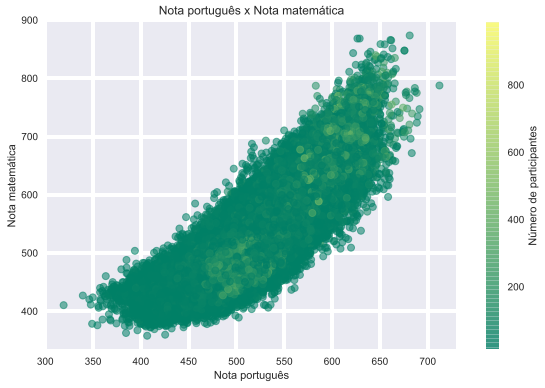

In [50]:
plt.style.use('seaborn')
plt.scatter(db.NU_MEDIA_LP, db.NU_MEDIA_MT, c=db.NU_PARTICIPANTES, cmap='summer', linewidth=1, alpha=0.55)

cbar = plt.colorbar()
cbar.set_label('Número de participantes')

plt.title('Nota português x Nota matemática')
plt.xlabel('Nota português')
plt.ylabel('Nota matemática')

plt.tight_layout()

plt.show()

É possível **classificar os dados por variáveis categóricas**. Nesse caso é preciso fazer dois plots.

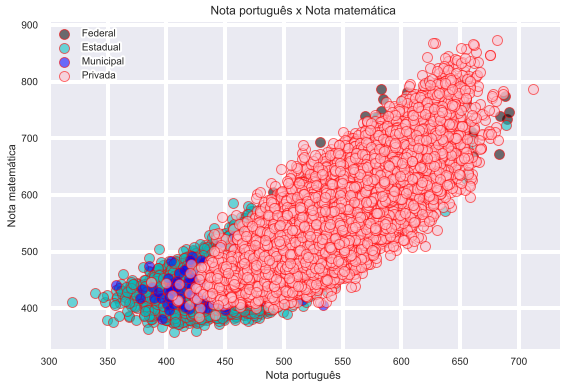

In [51]:
plt.style.use('seaborn')
plt.scatter(db[db.TP_DEPENDENCIA_ADM_ESCOLA==1].NU_MEDIA_LP, db[db.TP_DEPENDENCIA_ADM_ESCOLA==1].NU_MEDIA_MT, s=100, 
            c='black', edgecolor='red', linewidth=1, alpha=0.55, label='Federal')
plt.scatter(db[db.TP_DEPENDENCIA_ADM_ESCOLA==2].NU_MEDIA_LP, db[db.TP_DEPENDENCIA_ADM_ESCOLA==2].NU_MEDIA_MT, s=100, 
            c='c', edgecolor='red', linewidth=1, alpha=0.55, label='Estadual')
plt.scatter(db[db.TP_DEPENDENCIA_ADM_ESCOLA==3].NU_MEDIA_LP, db[db.TP_DEPENDENCIA_ADM_ESCOLA==3].NU_MEDIA_MT, s=100, 
            c='blue', edgecolor='red', linewidth=1, alpha=0.55, label='Municipal')
plt.scatter(db[db.TP_DEPENDENCIA_ADM_ESCOLA==4].NU_MEDIA_LP, db[db.TP_DEPENDENCIA_ADM_ESCOLA==4].NU_MEDIA_MT, s=100, 
            c='pink', edgecolor='red', linewidth=1, alpha=0.55, label='Privada')

plt.legend()
plt.title('Nota português x Nota matemática')
plt.xlabel('Nota português')
plt.ylabel('Nota matemática')

plt.tight_layout()

plt.show()

Também é possível mudar a escala dos eixos usando as funções `plt.xscale()` e `plt.ylabel()` para os eixos x e y, respectivamente.

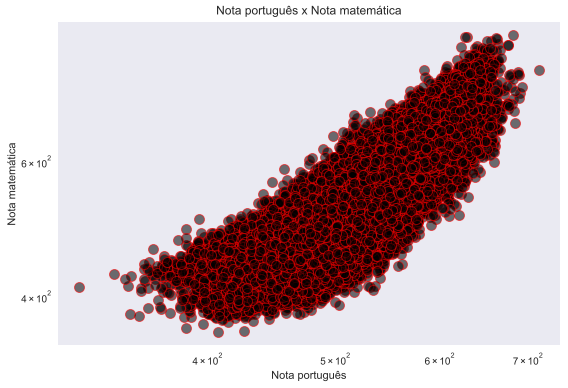

In [52]:
plt.style.use('seaborn')
plt.scatter(db.NU_MEDIA_LP, db.NU_MEDIA_MT, s=100, c='black', edgecolor='red', linewidth=1, alpha=0.55)

plt.xscale('log')
plt.yscale('log')

plt.title('Nota português x Nota matemática')
plt.xlabel('Nota português')
plt.ylabel('Nota matemática')

plt.tight_layout()

plt.show()

# Subplots

Nos gráficos de linha, conseguimos plotar gráficos juntos usando duas vezes a função `plot()`.

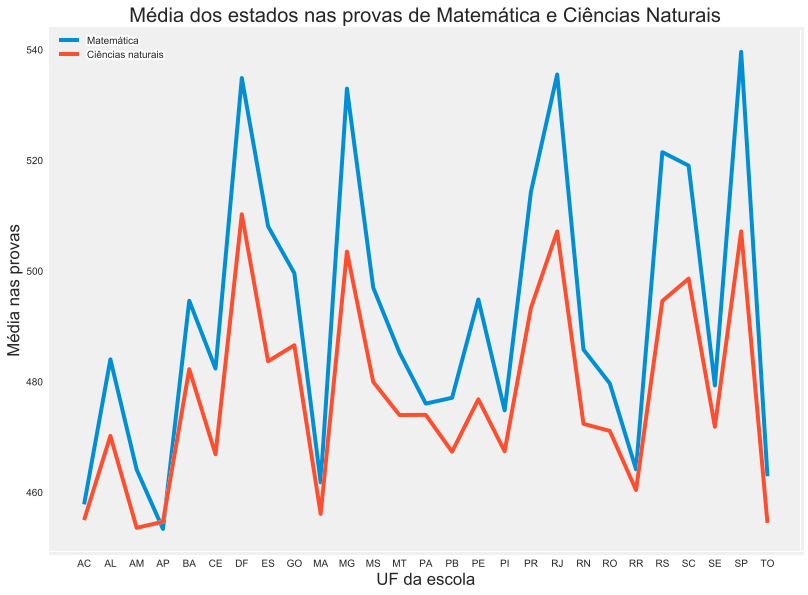

In [53]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('fivethirtyeight') # Define o estilo
plt.xlabel('UF da escola') # Define o nome do eixo x
plt.ylabel('Média nas provas') # Define o nome do eixo y
plt.title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
plt.grid(False)

plt.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label='Matemática') # Cria um gráfico de linhas simples matemática
plt.plot(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN, label='Ciências naturais') # Cria um gráfico de linhas simples ciências

plt.legend()
plt.show()

gcf: get current figure
gca: get current axes

Em algumas situações precisamos dos gráficos juntos, mas em eixos separados. Por isso usamos `subplots()`. 
* Definimos uma figura (`fig`) e o número de eixos ( `ax`). 
* Depois disso, trocamos os `plt` por `ax` nos plots.
* Adicionamos `set_` para o título, legenda e nomes de eixos.

<Figure size 864x648 with 0 Axes>

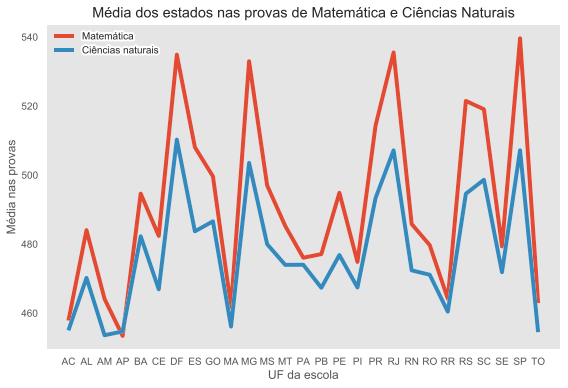

In [54]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('ggplot') # Define o estilo

fig, ax = plt.subplots()

ax.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label='Matemática') # Cria um gráfico de linhas simples matemática
ax.plot(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN, label='Ciências naturais') # Cria um gráfico de linhas simples ciências

ax.legend()
ax.set_xlabel('UF da escola') # Define o nome do eixo x
ax.set_ylabel('Média nas provas') # Define o nome do eixo y
ax.set_title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
plt.grid(False)

plt.tight_layout()
plt.show()

O gráfico anterior é igual ao antes dele. Para o resultado que queremos, precisamos criar dois subplots, adicionando os parâmetros `nrows`e `ncols`.

<Figure size 864x648 with 0 Axes>

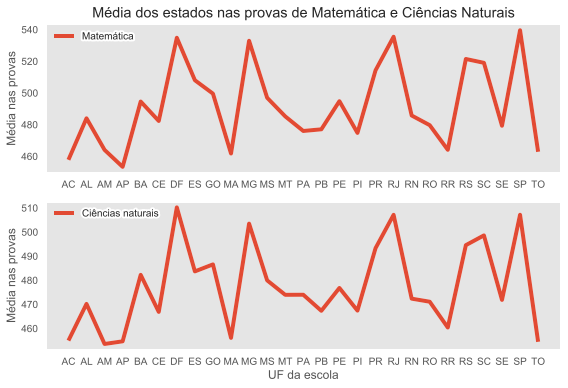

In [55]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('ggplot') # Define o estilo

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

ax1.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label='Matemática') # Cria um gráfico de linhas simples matemática
ax2.plot(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN, label='Ciências naturais') # Cria um gráfico de linhas simples ciências

ax1.legend()
#ax1.set_xlabel('UF da escola') # Define o nome do eixo x
ax1.set_ylabel('Média nas provas') # Define o nome do eixo y
ax1.set_title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
ax1.grid(False)

ax2.legend()
ax2.set_xlabel('UF da escola') # Define o nome do eixo x
ax2.set_ylabel('Média nas provas') # Define o nome do eixo y
#ax2.set_title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
ax2.grid(False)

plt.tight_layout()
plt.show()

Como o eixo x é igual para ambos os gráficos, podemos reduzir o número de informações compartilhando o eixo com o parâmetro `sharex`.

<Figure size 864x648 with 0 Axes>

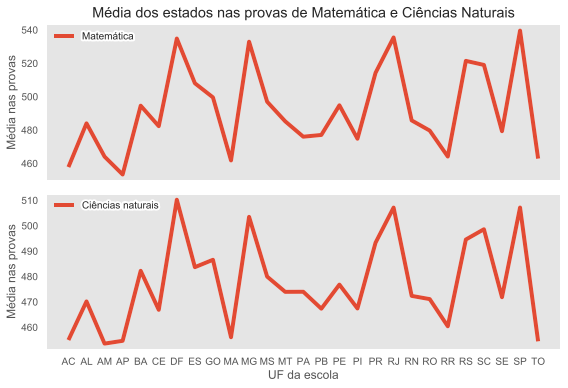

In [56]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('ggplot') # Define o estilo

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label='Matemática') # Cria um gráfico de linhas simples matemática
ax2.plot(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN, label='Ciências naturais') # Cria um gráfico de linhas simples ciências

ax1.legend()
#ax1.set_xlabel('UF da escola') # Define o nome do eixo x
ax1.set_ylabel('Média nas provas') # Define o nome do eixo y
ax1.set_title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
ax1.grid(False)

ax2.legend()
ax2.set_xlabel('UF da escola') # Define o nome do eixo x
ax2.set_ylabel('Média nas provas') # Define o nome do eixo y
#ax2.set_title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
ax2.grid(False)

plt.tight_layout()
plt.show()

Para adicionar duas séries no mesmo gráfico basta indicar qual o subgráfico.

<Figure size 864x648 with 0 Axes>

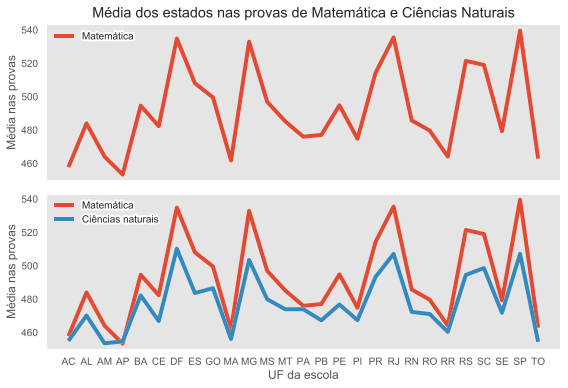

In [57]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('ggplot') # Define o estilo

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label='Matemática') # Cria um gráfico de linhas simples matemática
ax2.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label='Matemática') # Cria um gráfico de linhas simples matemática
ax2.plot(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN, label='Ciências naturais') # Cria um gráfico de linhas simples ciências

ax1.legend()
#ax1.set_xlabel('UF da escola') # Define o nome do eixo x
ax1.set_ylabel('Média nas provas') # Define o nome do eixo y
ax1.set_title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
ax1.grid(False)

ax2.legend()
ax2.set_xlabel('UF da escola') # Define o nome do eixo x
ax2.set_ylabel('Média nas provas') # Define o nome do eixo y
#ax2.set_title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
ax2.grid(False)

plt.tight_layout()
plt.show()

Os gráficos anteriores fazem parte da mesma figura. Se precisarmos separas as figuras para salvarmos, por exemplo, criamos dois subplots.

<Figure size 864x648 with 0 Axes>

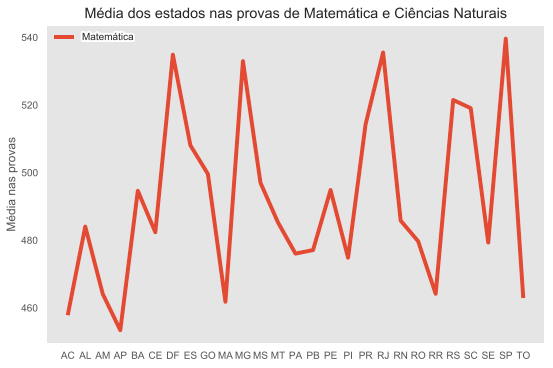

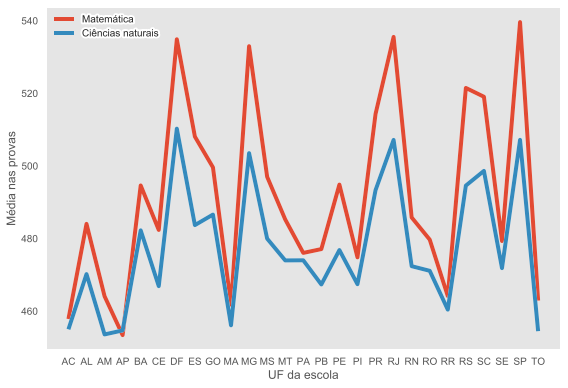

In [58]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('ggplot') # Define o estilo

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label='Matemática') # Cria um gráfico de linhas simples matemática
ax2.plot(db_mt.SG_UF_ESCOLA, db_mt.NU_MEDIA_MT, label='Matemática') # Cria um gráfico de linhas simples matemática
ax2.plot(db_cn.SG_UF_ESCOLA, db_cn.NU_MEDIA_CN, label='Ciências naturais') # Cria um gráfico de linhas simples ciências

ax1.legend()
#ax1.set_xlabel('UF da escola') # Define o nome do eixo x
ax1.set_ylabel('Média nas provas') # Define o nome do eixo y
ax1.set_title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
ax1.grid(False)

ax2.legend()
ax2.set_xlabel('UF da escola') # Define o nome do eixo x
ax2.set_ylabel('Média nas provas') # Define o nome do eixo y
#ax2.set_title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
ax2.grid(False)

plt.tight_layout()
plt.show()

fig1.savefig('fig1.png')
fig2.savefig('fig2.png')

# Box plot

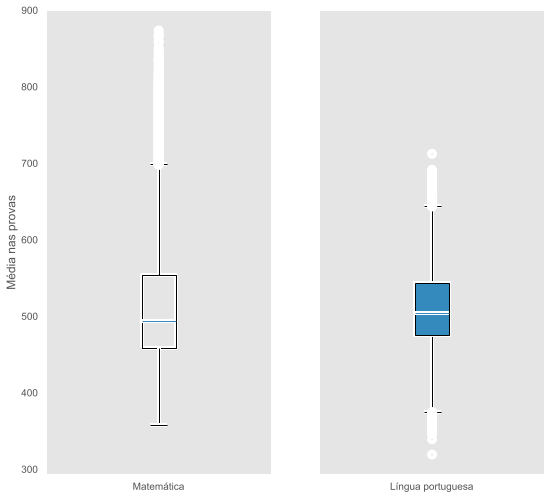

In [59]:
plt.style.use('ggplot') # Define o estilo

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8,8))

ax1.boxplot(db[db.NU_MEDIA_MT.notnull()].NU_MEDIA_MT, vert=True, patch_artist=False)
ax2.boxplot(db[db.NU_MEDIA_LP.notnull()].NU_MEDIA_LP, vert=True, patch_artist=True)

ax1.set_ylabel('Média nas provas') # Define o nome do eixo y
ax1.grid(False)
#ax1.xticks(labels = ['Matemática']) # Adicionando descrições para o eixo x


#ax2.set_ylabel('Média nas provas') # Define o nome do eixo y
#ax2.set_title('Média dos estados nas provas de Matemática e Ciências Naturais') # Define o título do gráfico
ax2.grid(False)

# Xtick labels
plt.setp(ax1, xticks=[1], xticklabels=['Matemática'])
plt.setp(ax2, xticks=[1], xticklabels=['Língua portuguesa'])

plt.show()

# Time Series

Os dados usados nessa parte são coletas dos últimso 5 anos (2014–2019) das ações AAPL (Apple) que estão no [Yahoo Finance](https://finance.yahoo.com/quote/AAPL/history?p=AAPL).

In [60]:
from matplotlib import dates as mpl_dates

In [61]:
# Importando dados
time_serie = pd.read_csv("AAPL.csv")

In [62]:
time_serie.head()

Date        Open        High         Low       Close   Adj Close  \
0  2019-04-12  199.199997  200.139999  196.210007  198.869995  196.300613   
1  2019-04-15  198.580002  199.850006  198.009995  199.229996  196.655960   
2  2019-04-16  199.460007  201.369995  198.559998  199.250000  196.675705   
3  2019-04-17  199.539993  203.380005  198.610001  203.130005  200.505585   
4  2019-04-18  203.119995  204.149994  202.520004  203.860001  201.226151   

     Volume  
0  27760700  
1  17536600  
2  25696400  
3  28906800  
4  24195800

In [63]:
time_serie['Date'] = pd.to_datetime(time_serie['Date']) # Confirma que a coluna de datas está com o formato adequado
time_serie.sort_values(by=['Date'], inplace=True) # Deixa os dados ordenados por data
#time_serie = time_serie[time_serie['Date'] >= '2020-02-26' ] # Filtro apenas um período para análise

A função `plot_date()` é responsável por mostrar uma série temporal.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


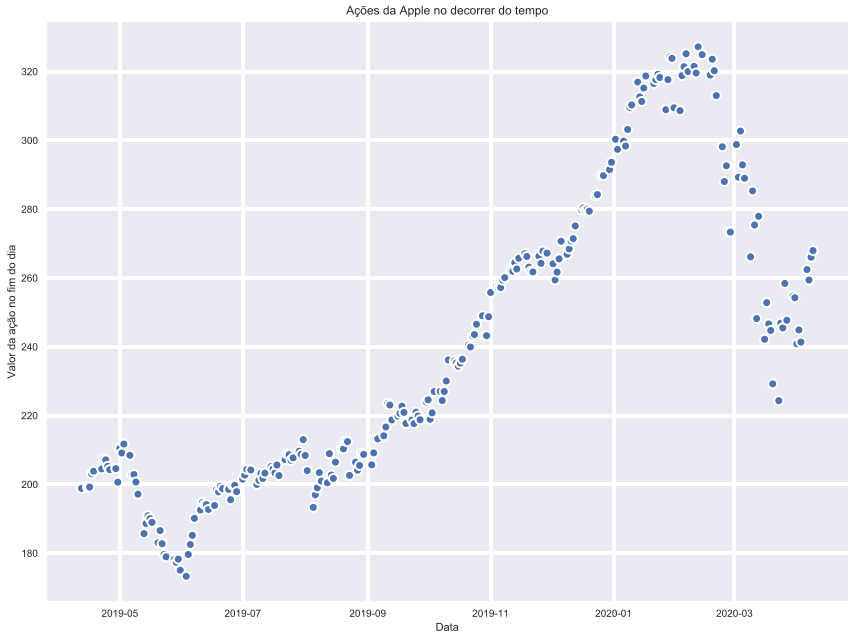

In [64]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('seaborn')
plt.xlabel('Data') # Define o nome do eixo x
plt.ylabel('Valor da ação no fim do dia') # Define o nome do eixo y
plt.title('Ações da Apple no decorrer do tempo') # Define o título do gráfico

plt.plot_date(time_serie.Date, time_serie.Close)

plt.tight_layout()
plt.show()

Como podem ver anteriormente, por padrão, o gráfico é de pontos. Para adicionar as linhas, use o parâmetro `linestyle`.

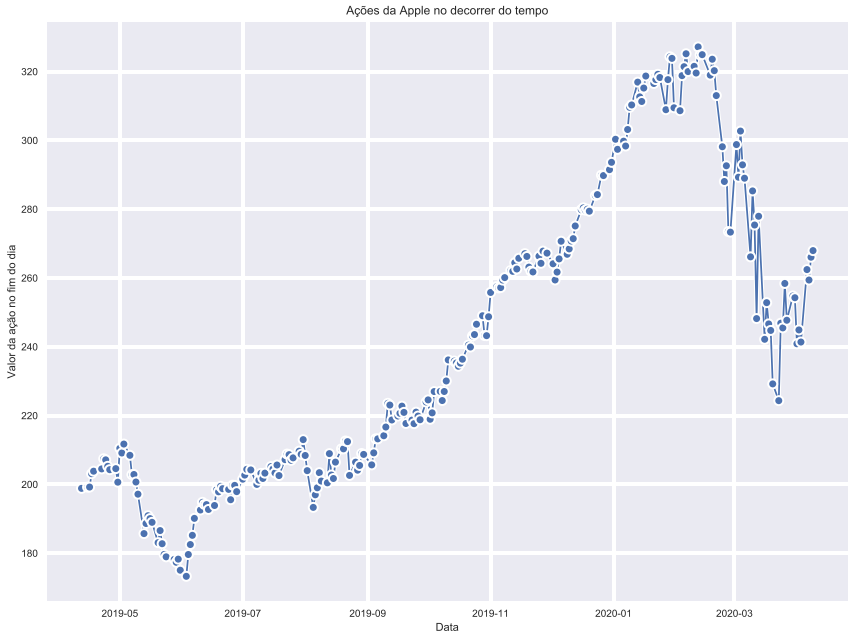

In [65]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('seaborn')
plt.xlabel('Data') # Define o nome do eixo x
plt.ylabel('Valor da ação no fim do dia') # Define o nome do eixo y
plt.title('Ações da Apple no decorrer do tempo') # Define o título do gráfico

plt.plot_date(time_serie.Date, time_serie.Close, linestyle='solid')

plt.tight_layout()
plt.show()

A função `gcf().autofmt_xdate()` gira as marcações do eixo x para melhor a vizualização.

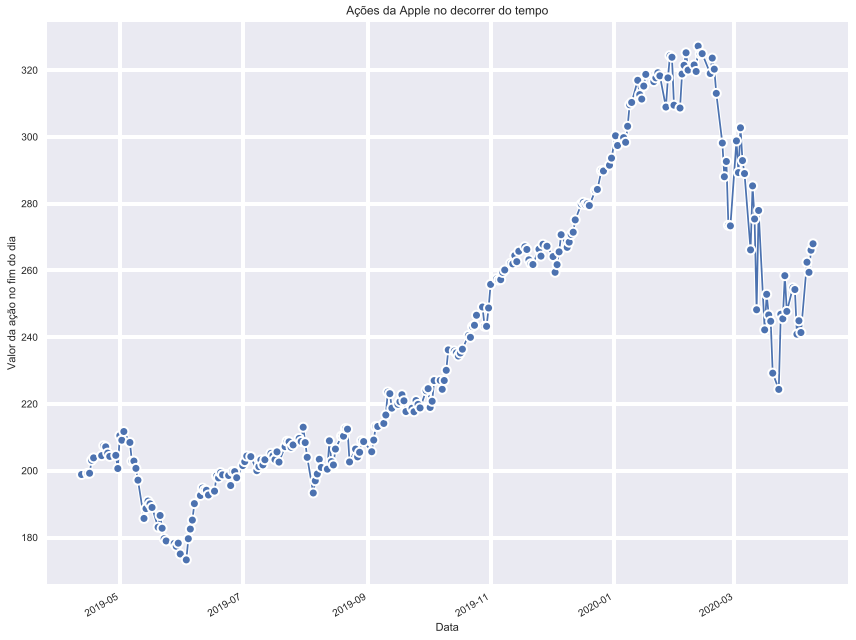

In [66]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('seaborn')
plt.xlabel('Data') # Define o nome do eixo x
plt.ylabel('Valor da ação no fim do dia') # Define o nome do eixo y
plt.title('Ações da Apple no decorrer do tempo') # Define o título do gráfico

plt.plot_date(time_serie.Date, time_serie.Close, linestyle='solid')
plt.gcf().autofmt_xdate() # Rotaciona a legenda do eixo x

plt.tight_layout()
plt.show()

A função `mpl_dates.DateFormatter()` muda o formato das datas e a função `gca().xaxis.set_major_formatter()` aplica essa mudança no gráfico.

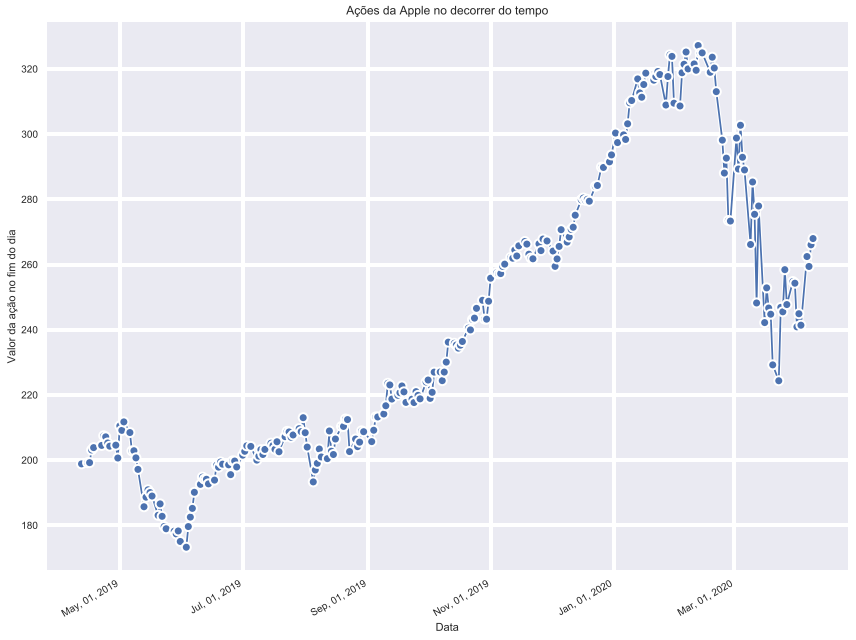

In [67]:
plt.figure(figsize=(12,9)) # Dimensões do gráfico
plt.style.use('seaborn')
plt.xlabel('Data') # Define o nome do eixo x
plt.ylabel('Valor da ação no fim do dia') # Define o nome do eixo y
plt.title('Ações da Apple no decorrer do tempo') # Define o título do gráfico

plt.plot_date(time_serie.Date, time_serie.Close, linestyle='solid')
plt.gcf().autofmt_xdate() # Rotaciona a legenda do eixo x

date_format = mpl_dates.DateFormatter('%b, %d, %Y')

plt.gca().xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.show()